## Sentiment analysis with Disneyland reviews

##### Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts. This is usually used on social media posts and customer reviews in order to automatically understand if some users are positive or negative and why

##### Content

- Review_ID: unique id given to each review
- Rating: ranging from 1 (unsatisfied) to 5 (satisfied)
- Year_Month: when the reviewer visited the theme park
- Reviewer_Location: country of origin of visitor
- Review_Text: comments made by visitor
- Disneyland_Branch: location of Disneyland Park

The dataset contains 42,656 rows and 6 columns. Each row represents a review, and the columns represent the review ID, rating, year and month of the review, reviewer's location, review text, and the branch of Disneyland that the review is for.

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/PJ/Downloads/Amazon Kindle Book Review/DisneylandReviews.csv', encoding='ISO-8859-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
# Checking the shape of the dataframe
df.shape

(42656, 6)

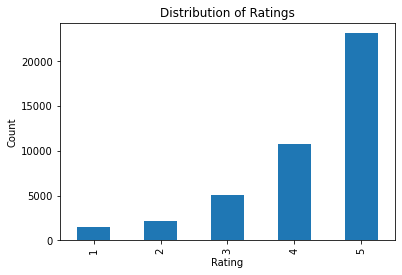

In [4]:
#Check the distribution of ratings in the reviews
import matplotlib.pyplot as plt

df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

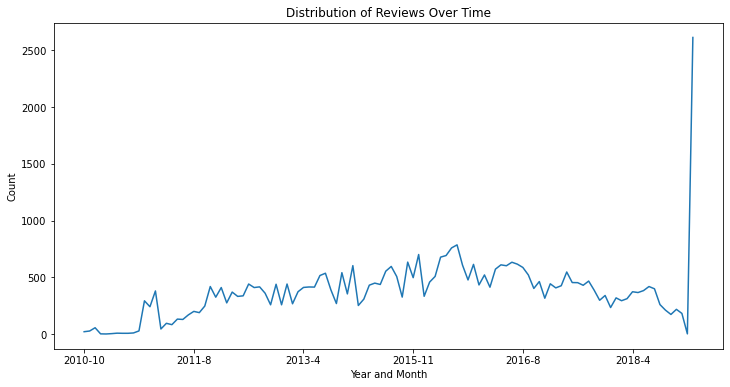

In [5]:
#Distribution of reviews over time 
df['Year_Month'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.xlabel('Year and Month')
plt.ylabel('Count')
plt.title('Distribution of Reviews Over Time')
plt.show()

#### We will now use the TextBlob library, which provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, and sentiment analysis.

In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['Review_Text'].apply(calculate_sentiment)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667


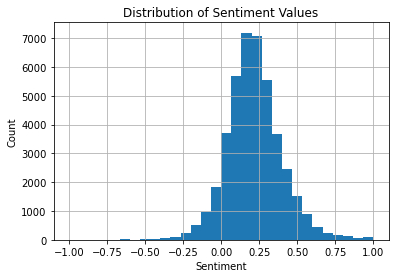

In [8]:
df['Sentiment'].hist(bins=30)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Values')
plt.show()

As we can see, the majority of the sentiment values are positive, which aligns with the high ratings that most of the reviews have. There are also some reviews with neutral sentiment (sentiment value close to zero) and a few reviews with negative sentiment.

### Before We go further, I would like to explore the given data first

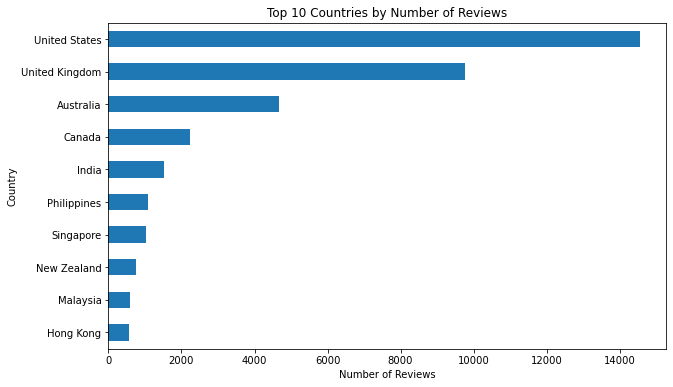

In [9]:
#top 10 countries with the most reviews
top_countries = df['Reviewer_Location'].value_counts().head(10)
top_countries.plot(kind='barh', figsize=(10,6))
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Reviews')
plt.gca().invert_yaxis()
plt.show()

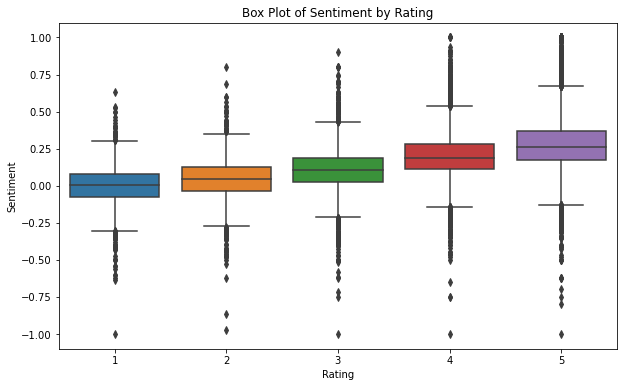

In [10]:
# the average sentiment by rating. This will give us an idea of how the sentiment analysis results align with the ratings.
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Sentiment', data=df)
plt.title('Box Plot of Sentiment by Rating')
plt.show()

As we can see, the median sentiment increases with the rating, which is expected. However, there is a wide range of sentiment values for each rating, especially for ratings 3 and 4. This indicates that the sentiment analysis results and the ratings do not always align perfectly, which is not surprising given the complexity and subjectivity of sentiment analysis and human ratings.

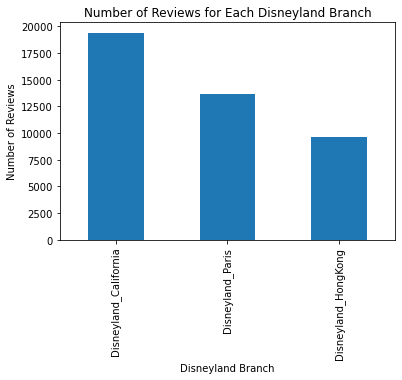

In [11]:
#the distribution of reviews for each Disneyland branch.
df['Branch'].value_counts().plot(kind='bar')
plt.xlabel('Disneyland Branch')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Disneyland Branch')
plt.show()

As we can see, Disneyland Paris has the most reviews, followed by Disneyland California and Disneyland Hong Kong.

In [12]:
#Now let's print some wordclouds to have a glimpse at what kind of words apear in our reviews
!pip install wordcloud

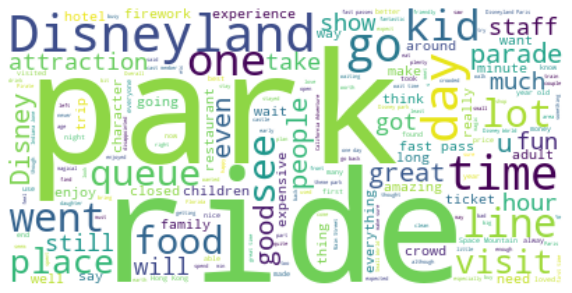

In [13]:
from wordcloud import WordCloud

text = ' '.join(review for review in df['Review_Text'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud shows the most frequently occurring words in the reviews. The size of each word indicates its frequency or importance. This visualization can give us a quick understanding of the main themes in the reviews. As we can see, words like "Disneyland", "ride", "time", "day", and "park" are among the most frequently mentioned, which is expected in Disneyland reviews.

#### The line graph comparing the sentiment distribution for positive and negative reviews:

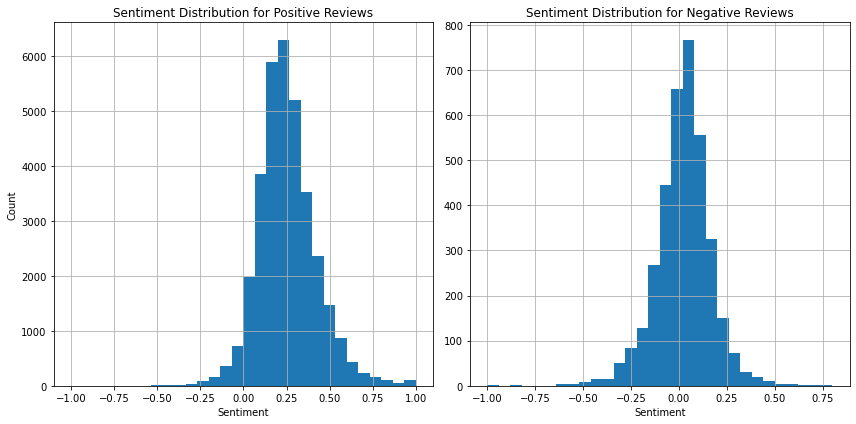

In [15]:
from textblob import TextBlob

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['Review_Text'].apply(calculate_sentiment)

positive_reviews = df[df['Rating'] >= 4]['Sentiment']
negative_reviews = df[df['Rating'] <= 2]['Sentiment']

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
positive_reviews.hist(bins=30)
plt.title('Sentiment Distribution for Positive Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
negative_reviews.hist(bins=30)
plt.title('Sentiment Distribution for Negative Reviews')
plt.xlabel('Sentiment')

plt.tight_layout()
plt.show()

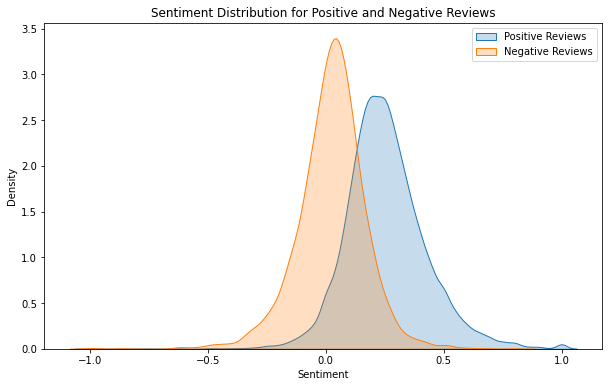

In [16]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(positive_reviews, label='Positive Reviews', shade=True)
sns.kdeplot(negative_reviews, label='Negative Reviews', shade=True)
plt.title('Sentiment Distribution for Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.legend()
plt.show()

As you can see, positive reviews (those with a rating of 4 or 5) tend to have higher sentiment scores, while negative reviews (those with a rating of 1 or 2) tend to have lower sentiment scores. This is consistent with our expectations and provides a visual confirmation that the sentiment scores calculated from the review text align well with the ratings given by the reviewers.

### Modelling reviewer_score

The goal is to classify the reviews into categories based on the Reviewer_Score (positive if the score is 4 or 5, and negative if the score is 1 or 2), this would be a classification problem, and algorithms such as logistic regression, decision trees, random forest, SVM, or neural networks could be used.

In the end, We decide to go with a Random Forest (RF) classifier for our predictions.

We first choose which features we want to use to train our model. Then we split our data into two parts:

- one to train our model
- one to assess its performances


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the target variable
df['Is_Positive'] = df['Rating'] >= 4

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Review_Text'], df['Is_Positive'], test_size=0.2, random_state=42)

# Transform the text data into TF-IDF features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.10      0.17      1755
        True       0.81      1.00      0.89      6777

    accuracy                           0.81      8532
   macro avg       0.88      0.55      0.53      8532
weighted avg       0.84      0.81      0.75      8532



##### From the report, we can see that the model has high precision but low recall for negative reviews (False), and high recall but lower precision for positive reviews (True). This means that the model is very accurate when it predicts a review to be negative, but it misses a lot of actual negative reviews. On the other hand, the model catches almost all positive reviews, but it also has some false positives.

##### The overall accuracy of the model is 0.81, which means that it correctly predicts whether a review is positive or negative 81% of the time. However, the macro-average F1-score, which gives equal weight to both classes, is only 0.53, indicating that the model's performance is not as good on the negative class. This is likely due to the imbalance in the dataset, as there are more positive reviews than negative reviews.

In [20]:
from sklearn.metrics import average_precision_score

# Calculate average precision score
average_precision = average_precision_score(y_test, y_pred_prob)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.95


##### The average precision-recall score for our Random Forest classifier is 0.95.

It computes the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.
An AP score of 0.95 indicates that our model is performing very well at distinguishing between positive and negative reviews, despite the imbalance in the dataset.

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.95')

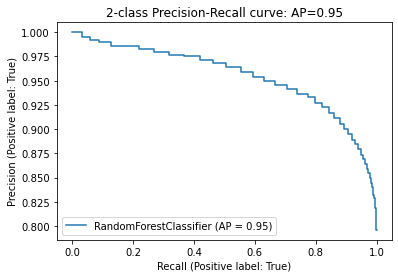

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

The curve shows the trade-off between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

The average precision score (AP) is also shown in the plot (AP=0.95), which is a way to summarize the Precision-Recall curve into a single value representing the average of all precisions.

#### This kind of data can often come as a good complementary source in data science projects in order to extract more learning features and increase the predictive power of the models.